In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset load
df=pd.read_csv('Psl_Complete_Dataset(2016-2024).csv')
df.head()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2
0,1,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,1,...,True,Mohammad Hafeez,caught,Sharjeel Khan,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
1,2,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,2,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
2,3,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,3,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
3,4,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,4,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza
4,5,1075986,2017-02-09,2017,Dubai International Cricket Stadium,1,Peshawar Zalmi,Islamabad United,1,5,...,False,NaN,NaN,NaN,Islamabad United,wickets 7,regular,BJ Haddin,Ahsan Raza,Shozab Raza


In [3]:
df.shape

(66112, 27)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66112 entries, 0 to 66111
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                66112 non-null  int64 
 1   match_id          66112 non-null  int64 
 2   date              66112 non-null  object
 3   season            66112 non-null  int64 
 4   venue             66112 non-null  object
 5   inning            66112 non-null  int64 
 6   batting_team      66112 non-null  object
 7   bowling_team      66112 non-null  object
 8   over              66112 non-null  int64 
 9   ball              66112 non-null  int64 
 10  batter            66112 non-null  object
 11  bowler            66112 non-null  object
 12  non_striker       66112 non-null  object
 13  batsman_runs      66112 non-null  int64 
 14  extra_runs        66112 non-null  int64 
 15  total_runs        66112 non-null  int64 
 16  extras_type       3561 non-null   object
 17  is_wicket   

In [5]:
df['player_of_match'].isnull().sum()

664

In [6]:
# We need to change the data-type in date column
df['date']=pd.to_datetime(df['date'],format='mixed')

In [7]:
df.sample()

,id,match_id,date,season,venue,inning,batting_team,bowling_team,over,ball,...,is_wicket,player_dismissed,dismissal_kind,fielder,winner,win_by,match_type,player_of_match,umpire_1,umpire_2
10090,253,1128838,2018-03-09,2018,Dubai International Cricket Stadium,2,Peshawar Zalmi,Islamabad United,14,5,...,False,NaN,NaN,NaN,Islamabad United,runs 26,regular,JP Duminy,Ahmed Shahab,Aleem Dar


In [8]:
df['season'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2016], dtype=int64)

In [9]:
df['venue'].unique()
# 'Gaddafi Stadium' and 'Gaddafi Stadium, Lahore' is the same value.
# 'National Stadium' and 'National Stadium, Karachi' is the same value.

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Gaddafi Stadium', 'National Stadium', 'Sheikh Zayed Stadium',
       'Multan Cricket Stadium', 'Rawalpindi Cricket Stadium',
       'National Stadium, Karachi', 'Sheikh Zayed Stadium, Abu Dhabi',
       'Gaddafi Stadium, Lahore'], dtype=object)

In [10]:
df["venue"] = df["venue"].replace('Gadaffi Stadium, Lahore', 'Gadaffi Stadium')
df["venue"] = df["venue"].replace('National Stadium, Karachi', 'National Stadium')

In [11]:
df['venue'].unique()

array(['Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'Gaddafi Stadium', 'National Stadium', 'Sheikh Zayed Stadium',
       'Multan Cricket Stadium', 'Rawalpindi Cricket Stadium',
       'Sheikh Zayed Stadium, Abu Dhabi', 'Gaddafi Stadium, Lahore'],
      dtype=object)

In [12]:
df['inning'].unique()
# 3 and 4 innings indicate super overs

array([1, 2, 3, 4], dtype=int64)

In [13]:
df['batting_team'].unique()

array(['Peshawar Zalmi', 'Islamabad United', 'Quetta Gladiators',
       'Lahore Qalandars', 'Karachi Kings', 'Multan Sultans'],
      dtype=object)

In [14]:
df['extras_type'].unique()

array([nan, 'legbyes', 'byes', 'wides', 'noballs', 'penalty',
       'byes,noballs', 'legbyes,noballs'], dtype=object)

In [16]:
df['dismissal_kind'].unique()

array(['caught', nan, 'bowled', 'lbw', 'run out', 'caught and bowled',
       'stumped', 'hit wicket', 'retired hurt', 'obstructing the field'],
      dtype=object)

In [17]:
df['match_type'].unique()

array(['regular', 'qualifier', 'final', 'eliminator'], dtype=object)

In [18]:
df.columns

Index(['id', 'match_id', 'date', 'season', 'venue', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder', 'winner', 'win_by',
       'match_type', 'player_of_match', 'umpire_1', 'umpire_2'],
      dtype='object')

## Column Description:

1. ID: A unique ID assigned to every ball bowled in PSL from 2016 to 2024.
2. Match_ID: A unique match ID assigned to every PSL match.
3. Date: The date on which the match was played.
4. Season: The PSL season in which the match was held. It has 9 unique values (2016–2024).
5. Venue: The stadium where the match was played. It has 9 unique values.
6. Inning: The inning of the match. The 3rd and 4th innings indicate a Super Over.
7. Batting Team: The team currently batting. It has 6 unique values.
8. Bowling Team: The team currently bowling.
9. Over: The over number in the match. Values range from 1 to 20.
10. Ball: The ball number within an over. Values range from 1 to 11 (considering extras like no-balls and wides).
11. Batter: The batsman on strike for that particular ball.
12. Bowler: The bowler delivering the ball.
13. Non-Striker: The non-striking batsman at the other end.
14. Batsman Runs: The number of runs scored by the batsman on that ball.
15. Extra Runs: The number of extra runs conceded on that ball.
16. Total Runs: The total runs scored on that ball, including extras.
17. Extras Type: The type of extra run awarded (if applicable). It has 7 different types.
18. Is Wicket: Indicates whether a wicket fell on that ball (Yes/No).
19. Player Dismissed: The name of the player who was dismissed on that ball.
20. Dismissal Kind: The mode of dismissal. It has 9 different types.
21. Fielder: The fielder involved in the dismissal (if applicable).
22. Winner: The team that won the match.
23. Win By: The margin of victory (e.g., runs or wickets).
24. Match Type: The type of match played. It has 4 categories: Regular, Qualifier, Eliminator, and Final.
25. Player of the Match: The best player of the match, as awarded post-game.
26. Umpire 1: The name of the first on-field umpire.
27. Umpire 2: The name of the second on-field umpire.

## General Match Analysis:

1.	How many matches were played in each season?
2.	Which team has won the most matches overall and in each season?
4.	What is the trend of total runs scored per season? Is PSL becoming more high-scors4ns?
6.	What are the highest and lowest team scores recorded in PSL hia5ches?
8.	How many matches have ended in a Supe Over?


In [18]:
# Total number of matches held?
total_matches=df['match_id'].nunique()
total_matches

280

#### 1. How many matches were held in each season?

In [19]:
season=df.groupby('season')
season['match_id'].nunique()

season
2016    23
2017    24
2018    33
2019    34
2020    32
2021    34
2022    34
2023    34
2024    32
Name: match_id, dtype: int64

#### 2. Which team has won the most matches overall and in each season?

In [20]:
match_winner=df.groupby('match_id')['winner']
winner_count=match_winner.first().value_counts()
winner_count

winner
Islamabad United     55
Peshawar Zalmi       54
Multan Sultans       45
Quetta Gladiators    44
Lahore Qalandars     40
Karachi Kings        36
No result             6
Name: count, dtype: int64

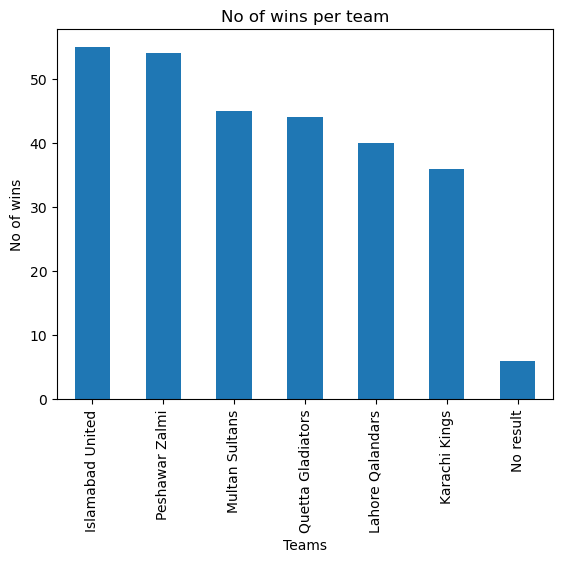

In [21]:
winner_count.plot(kind='bar')
plt.xlabel('Teams')
plt.ylabel('No of wins')
plt.title('No of wins per team')
plt.show()

In [22]:
season_winner=df.groupby(['match_id','season'])['winner'].first()
season_winner_count=season_winner.groupby('season').value_counts().unstack().fillna(0)
season_winner_count

winner,Islamabad United,Karachi Kings,Lahore Qalandars,Multan Sultans,No result,Peshawar Zalmi,Quetta Gladiators
season,,,,,,,
2016,7.0,2.0,2.0,0.0,0.0,5.0,7.0
2017,4.0,5.0,3.0,0.0,1.0,6.0,5.0
2018,8.0,5.0,2.0,4.0,2.0,7.0,5.0
2019,6.0,5.0,3.0,3.0,0.0,8.0,9.0
2020,3.0,6.0,7.0,6.0,2.0,4.0,4.0
2021,8.0,5.0,5.0,7.0,0.0,7.0,2.0
2022,5.0,1.0,8.0,10.0,1.0,5.0,4.0
2023,6.0,3.0,9.0,7.0,0.0,6.0,3.0
2024,8.0,4.0,1.0,8.0,0.0,6.0,5.0


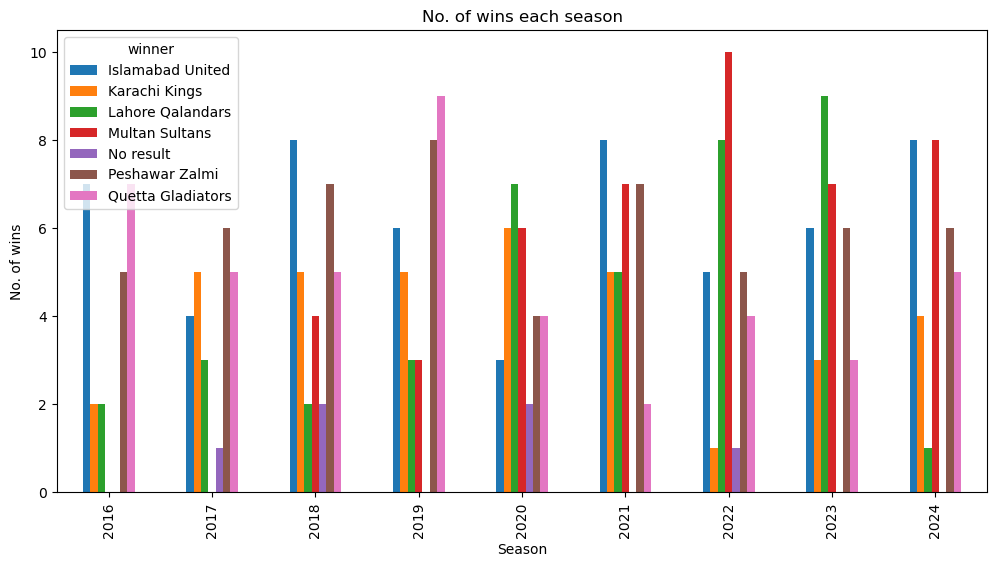

In [23]:
season_winner_count.plot(kind='bar',figsize=(12,6))
plt.xlabel('Season')
plt.ylabel('No. of wins')
plt.title('No. of wins each season')
plt.show()

#### 3.	What is the trend of total runs scored per season?

In [24]:
runs_each_season=season['total_runs'].sum()
runs_each_season

season
2016     6634
2017     6817
2018     9762
2019    10457
2020     9899
2021    11153
2022    11530
2023    12051
2024    10909
Name: total_runs, dtype: int64

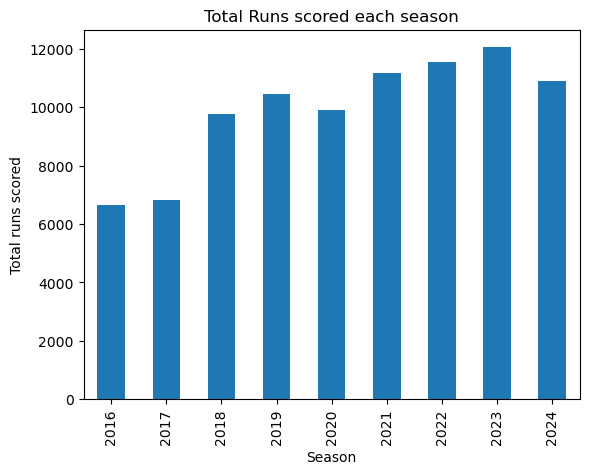

In [25]:
runs_each_season.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Total runs scored')
plt.title('Total Runs scored each season')
plt.show()

#### 4. What are the highest and lowest team scores recorded in PSL history?

In [26]:
team_score=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
print('Max score =',team_score['total_runs'].max())
print('Min score =',team_score['total_runs'].min())

Max score = 262
Min score = 5


#### 5. How many matches have ended in a Super Over?

In [27]:
super_over_matches=df[df['inning']==3]['match_id'].nunique()
super_over_matches

4

## Batting Analysis:

1.	Who are the top run-scorers across all seasons?
2.	What is the distribution of runs scored per over?
3.	Who has hit the most sixes and fours in PSL history?
4.	Which batsman has the highest average?
5.	Which batsmen has highest runs in powerplays and death overs?

#### 1. Who are the top run-scorers across all seasons?

In [28]:
top_scorers=df.groupby('batter')['batsman_runs'].sum()
top_3_batsman=top_scorers.sort_values(ascending=False)[:3]
top_3_batsman

batter
Babar Azam         3504
Fakhar Zaman       2530
Mohammad Rizwan    2403
Name: batsman_runs, dtype: int64

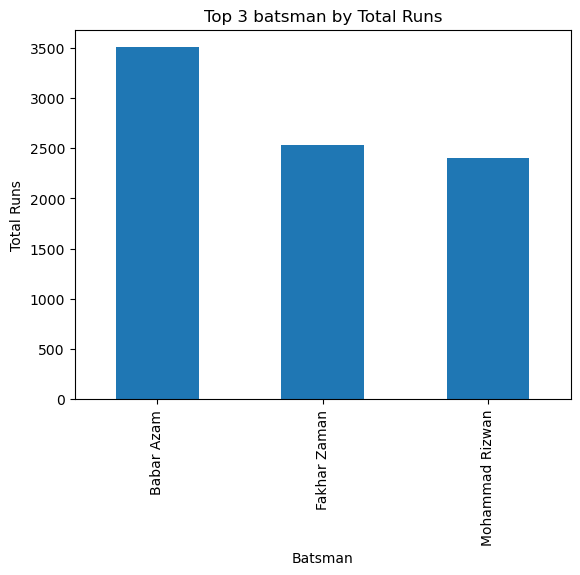

In [29]:
top_3_batsman.plot(kind='bar')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 3 batsman by Total Runs')
plt.show()

#### 2. What is the distribution of runs scored per over?

In [30]:
runs_per_over=df.groupby(['over','match_id','inning'])['total_runs'].sum().reset_index()
avg_runs_per_over=runs_per_over.groupby('over')['total_runs'].mean()
avg_runs_per_over.round(2)

over
1      6.64
2      7.72
3      8.09
4      8.63
5      8.44
6      8.39
7      7.31
8      7.23
9      7.67
10     7.71
11     8.02
12     7.83
13     7.98
14     8.83
15     8.45
16     9.26
17     9.42
18     9.79
19     9.93
20    10.08
Name: total_runs, dtype: float64

<Axes: xlabel='over'>

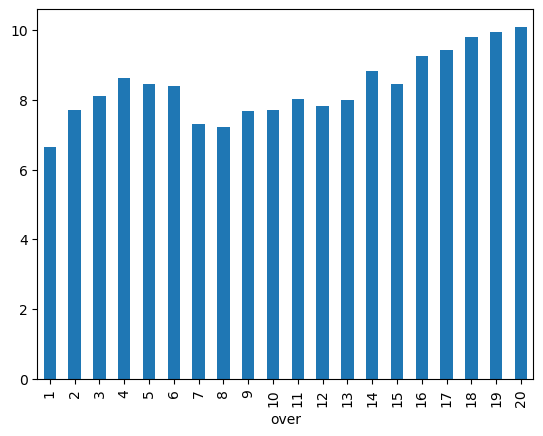

In [31]:
avg_runs_per_over.plot(kind='bar')

#### 3. Who has hit the most sixes and fours in PSL history?

In [32]:
most_six=df[df['batsman_runs']==6]['batter']
most_six.value_counts()[:3]

batter
Fakhar Zaman    104
Asif Ali         92
Kamran Akmal     87
Name: count, dtype: int64

In [33]:
most_fours=df[df['batsman_runs']==4]['batter']
most_fours.value_counts()[:3]

batter
Babar Azam         386
Fakhar Zaman       238
Mohammad Rizwan    216
Name: count, dtype: int64

#### 4. Which batsman has the highest average?

In [34]:
batsman_runs=df.groupby('batter')['total_runs'].sum().reset_index()
dismissals=df['player_dismissed'].value_counts().reset_index()
dismissals.columns=['batter','dismissals']

In [35]:
batting_avg=batsman_runs.merge(dismissals,on='batter',how='left')
batting_avg['avg_runs']=(batting_avg['total_runs']/batting_avg['dismissals']).round(2)
batting_avg.sort_values(ascending=False,by='avg_runs')[:5]

,batter,total_runs,dismissals,avg_runs
144,JW Wells,68,1.0,68.00
116,IR Bell,58,1.0,58.00
1,AB de Villiers,226,4.0,56.50
321,Usman Khan,773,14.0,55.21
102,HC Brook,275,5.0,55.00


#### 5. Which batsmen has highest runs in powerplays and death overs?

In [36]:
powerplay=df[df['over'].between(1,6)]
powerplay_runs=powerplay.groupby('batter')['total_runs'].sum()
powerplay_runs.sort_values(ascending=False)[:3]

batter
Babar Azam      1622
Fakhar Zaman    1454
Kamran Akmal    1178
Name: total_runs, dtype: int64

In [37]:
death_overs=df[df['over'].between(16,20)]
death_overs_runs=death_overs.groupby('batter')['total_runs'].sum()
death_overs_runs.sort_values(ascending=False)[:3]

batter
Imad Wasim      733
Shoaib Malik    698
KA Pollard      670
Name: total_runs, dtype: int64

## Bowling Analysis:

1.	Who are the highest wicket-takers in PSL history?
2.  Which bowler has taken the most wickets in powerplays?
3.	Which bowlers have the highest dot-balls in PSL?
4.	Which bowlers have the highest extras in PSL?
5.	Which bowler has the best economy rate in death overs?

#### 1. Who are the highest wicket-takers in PSL history?

In [38]:
wicket_data=df[df['is_wicket']==1]
wicket=wicket_data.groupby('bowler')['is_wicket'].count()
top3_wicket=wicket.sort_values(ascending=False)[:3]
top3_wicket

bowler
Wahab Riaz             126
Hasan Ali              118
Shaheen Shah Afridi    112
Name: is_wicket, dtype: int64

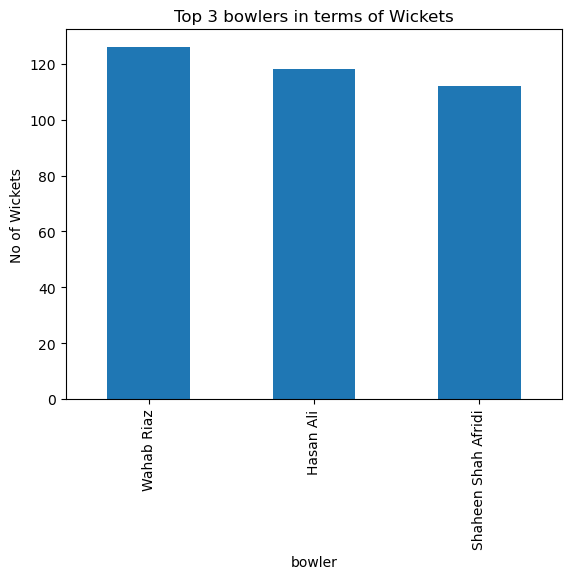

In [39]:
top3_wicket.plot(kind='bar')
plt.xlabel('bowler')
plt.ylabel('No of Wickets')
plt.title('Top 3 bowlers in terms of Wickets')
plt.show()

#### 2. Which bowler has taken the most wickets in powerplays?

In [40]:
powerplay_wicket=df[(df['is_wicket']==1) & (df['over'].between(1,6))]
powerplay_bowler=powerplay_wicket.groupby('bowler')['is_wicket'].count()
top3_powerplay=powerplay_bowler.sort_values(ascending=False)[:3]
top3_powerplay

bowler
Shaheen Shah Afridi    41
Hasan Ali              41
Mohammad Amir          30
Name: is_wicket, dtype: int64

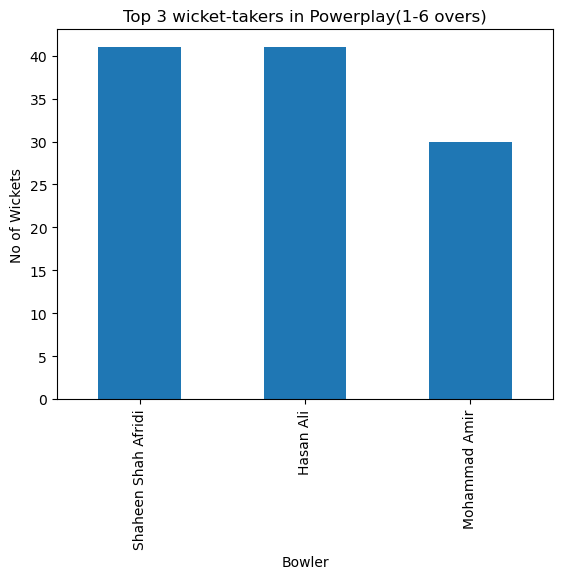

In [41]:
top3_powerplay.plot(kind='bar')
plt.xlabel('Bowler')
plt.ylabel('No of Wickets')
plt.title('Top 3 wicket-takers in Powerplay(1-6 overs)')
plt.show()

#### 3. Which bowlers have the highest dot-balls in PSL?

In [42]:
dot_ball=df[df['total_runs']==0]
dot_ball_bowlers=dot_ball.groupby('bowler')['ball'].count()
top3_dot_ball=dot_ball_bowlers.sort_values(ascending=False)[:3]
top3_dot_ball

bowler
Wahab Riaz       767
Hasan Ali        707
Mohammad Amir    652
Name: ball, dtype: int64

Text(0.5, 1.0, 'Top 3 bowlers in terms of most dot-balls')

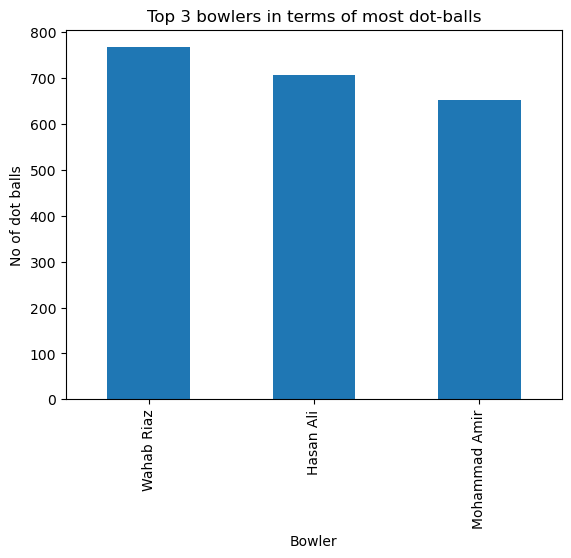

In [43]:
top3_dot_ball.plot(kind='bar')
plt.xlabel('Bowler')
plt.ylabel('No of dot balls')
plt.title('Top 3 bowlers in terms of most dot-balls')

#### 4. Which bowlers have the highest extras in PSL?

In [44]:
extras=df[df['extra_runs']!=0]
bowlers_extra=extras.groupby('bowler')['ball'].count()
top3_extras=bowlers_extra.sort_values(ascending=False)[:3]
top3_extras

bowler
Mohammad Amir          166
Wahab Riaz             157
Shaheen Shah Afridi    138
Name: ball, dtype: int64

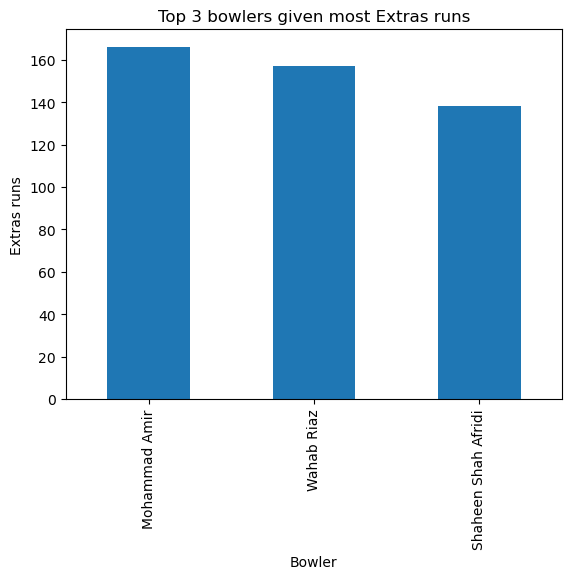

In [45]:
top3_extras.plot(kind='bar')
plt.xlabel('Bowler')
plt.ylabel('Extras runs')
plt.title('Top 3 bowlers given most Extras runs')
plt.show()

#### 5. Which bowler has the best economy rate in death overs?

In [46]:
death_over=df[df['over'].between(16,20)]
death_over_runs=death_over.groupby('bowler')['total_runs'].sum().reset_index()
death_over_balls=death_over.groupby('bowler')['ball'].count().reset_index()
death_over_stats=death_over_runs.merge(death_over_balls,on='bowler')
death_over_stats['economy']=((death_over_stats['total_runs']/death_over_stats['ball'])*6).round(2)

In [47]:
death_over_stats=death_over_stats[death_over_stats['ball']>100]
top3_economy=death_over_stats[['bowler','economy']].sort_values(by='economy')[:3]
top3_economy

,bowler,economy
73,Imran Tahir,6.69
140,Rahat Ali,7.17
173,TS Mills,7.26


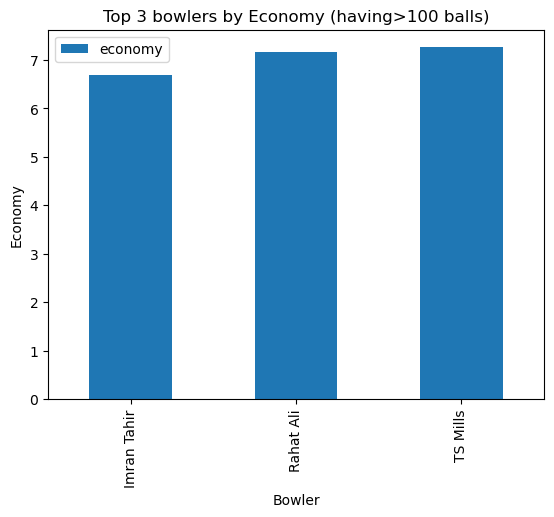

In [48]:
top3_economy.plot(kind='bar',x='bowler')
plt.xlabel('Bowler')
plt.ylabel('Economy')
plt.title('Top 3 bowlers by Economy (having>100 balls)')
plt.show()

## Match situations and dismissal types:

1.	What is the average first-innings score per season?
2.	What are the most common modes of dismissal in PSL?
3.	Which fielders have taken the most catches in PSL?
4.	How often does a team successfully chase a target in PSL?
5.	What is the highest no. of sixes hit in single PSL match?
6.	Which bowlers have taken the most wickets through LBW?
7.	Which fielders have been involved in the most run-outs?

#### 1. What is the average first-innings score per season?

In [56]:
first_inning=df[df['inning']==1]
match_score=first_inning.groupby(['match_id','season'])['total_runs'].sum()
avg_score=match_score.groupby('season').mean().round(2)
avg_score

season
2016    146.96
2017    148.12
2018    152.55
2019    157.32
2020    161.19
2021    170.00
2022    179.21
2023    190.65
2024    176.47
Name: total_runs, dtype: float64

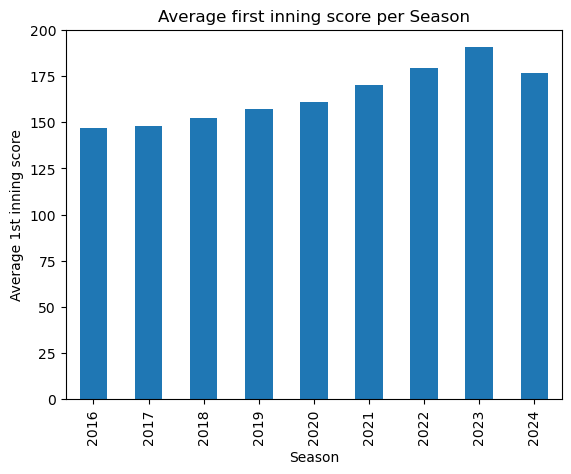

In [58]:
avg_score.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average 1st inning score')
plt.title('Average first inning score per Season')
plt.show()

#### 2.What are the most common modes of dismissal in PSL?

In [60]:
dismissal_mode=df['dismissal_kind'].value_counts()
dismissal_mode

dismissal_kind
caught                   2097
bowled                    684
run out                   280
lbw                       268
caught and bowled          96
stumped                    71
hit wicket                  5
retired hurt                2
obstructing the field       1
Name: count, dtype: int64

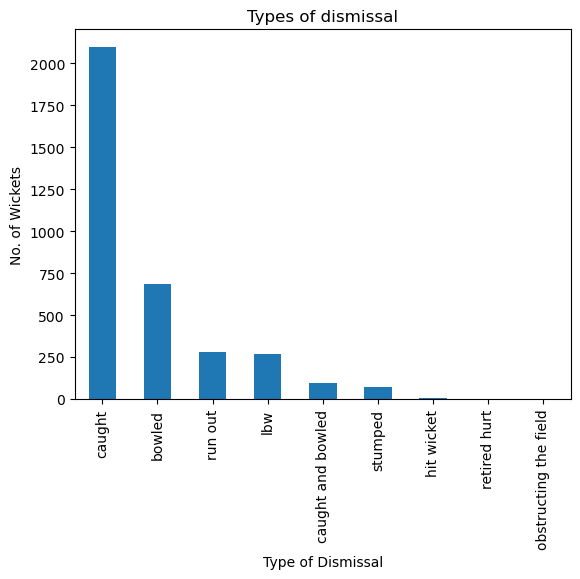

In [63]:
dismissal_mode.plot(kind='bar')
plt.xlabel('Type of Dismissal')
plt.ylabel('No. of Wickets')
plt.title('Types of dismissal')
plt.show()

#### 3. Which fielders have taken the most catches in PSL?

In [69]:
caught=df[df['dismissal_kind']=='caught']
fielder_caught=caught['fielder'].value_counts()
top3_fielders=fielder_caught[:3]
top3_fielders

fielder
Mohammad Rizwan    72
Kamran Akmal       53
Babar Azam         47
Name: count, dtype: int64

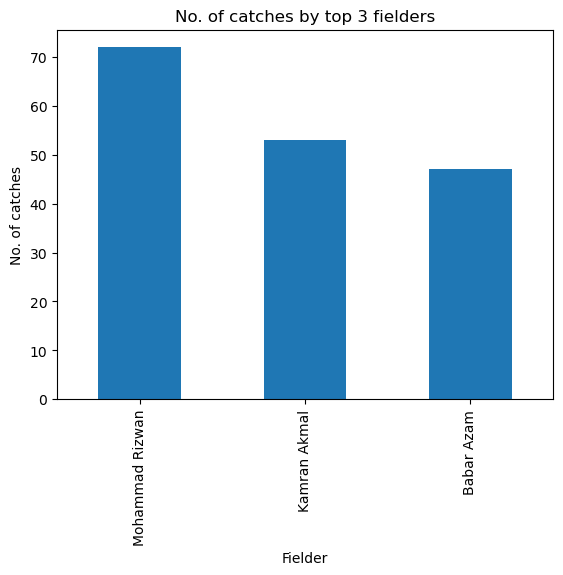

In [72]:
top3_fielders.plot(kind='bar')
plt.xlabel('Fielder')
plt.ylabel('No. of catches')
plt.title('No. of catches by top 3 fielders')
plt.show()

#### 4. How often does a team successfully chase a target in PSL?

In [76]:
num_chased_matches=df[df['win_by'].str.contains('wickets')]['match_id'].nunique()

In [83]:
total_result_matches=df[df['win_by'].notna()]['match_id'].nunique()-df[df['win_by']=='no result']['match_id'].nunique()

In [89]:
successful_chased_matches=(num_chased_matches/total_result_matches)*100
print('Percent of successful target chase: ',round(successful_chased_matches,2),'%')

Percent of successful target chase:  54.68 %


#### 5. What is the highest no. of sixes hit in single PSL match?

In [101]:
sixes=df[df['batsman_runs']==6]
six_per_match=sixes.groupby('match_id')['batsman_runs'].count()
six_per_match.sort_values(ascending=False).head(1)

match_id
1354951    33
Name: batsman_runs, dtype: int64

#### 6. Which bowlers have taken the most wickets through LBW?

In [111]:
lbw_wickets=df[df['dismissal_kind']=='lbw']
lbw_bowlers=lbw_wickets.groupby('bowler')['dismissal_kind'].count()
top3_lbw=lbw_bowlers.sort_values(ascending=False)[:3]
top3_lbw

bowler
Shadab Khan    21
Hasan Ali      10
Rashid Khan     9
Name: dismissal_kind, dtype: int64

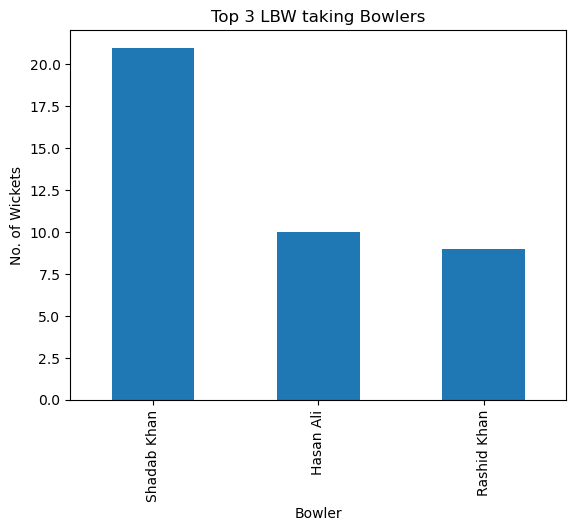

In [113]:
top3_lbw.plot(kind='bar')
plt.xlabel('Bowler')
plt.ylabel('No. of Wickets')
plt.title('Top 3 LBW taking Bowlers')
plt.show()

#### 7. Which fielders have been involved in the most run-outs?

In [23]:
run_out=df[df['dismissal_kind']=='run out']
fielder_run_out=run_out.groupby('fielder')['dismissal_kind'].count()
top3_runout=fielder_run_out.sort_values(ascending=False)[:3]
top3_runout

fielder
Mohammad Rizwan    10
SD Hope             5
Shadab Khan         5
Name: dismissal_kind, dtype: int64

Text(0.5, 1.0, 'Top 3 fielders in terms of No. of Run Out')

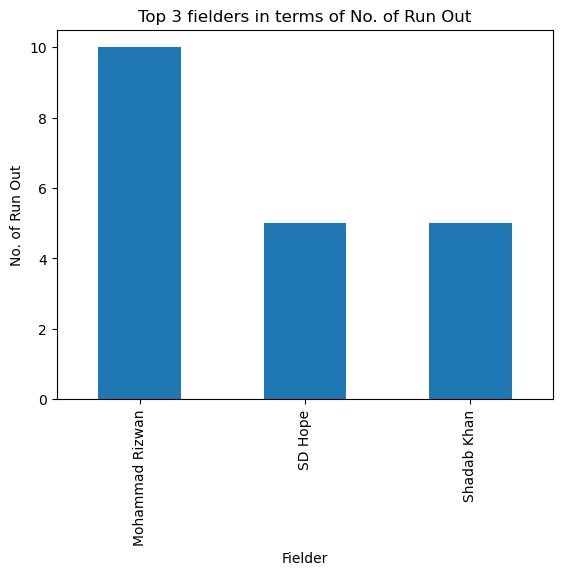

In [26]:
top3_runout.plot(kind='bar')
plt.xlabel('Fielder')
plt.ylabel('No. of Run Out')
plt.title('Top 3 fielders in terms of No. of Run Out')